## ДЗ “Обучение без учителя”

#### Задание 1<br>
Импортируйте библиотеки pandas, numpy и matplotlib.<br>
Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.<br>
Создайте датафреймы X и y из этих данных. Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.<br>
Масштабируйте данные с помощью StandardScaler.<br>
Постройте модель TSNE на тренировочный данных с параметрами:<br>
n_components=2, learning_rate=250, random_state=42.<br>
Постройте диаграмму рассеяния на этих данных.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()

data = boston["data"]
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

In [3]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state =42)

In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


In [6]:
from sklearn.manifold import TSNE

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

X_train_tsne = tsne.fit_transform(X_train_scaled)

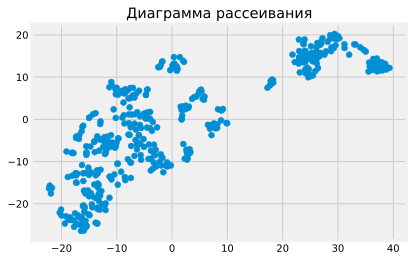

In [7]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.title('Диаграмма рассеивания')

plt.show()

#### Задание 2<br>
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.<br>
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.<br>
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.<br>
Вычислите средние значения price и CRIM в разных кластерах.<br>



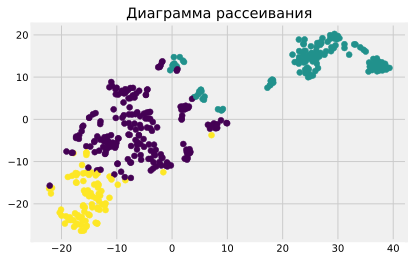

In [8]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, max_iter = 100, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)

plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1],c=labels_train)

plt.title('Диаграмма рассеивания')

plt.show()

In [9]:
print('Средняя цена в кластере 0 = {}'.format(y_train.loc[labels_train == 0, 'price'].mean()))
print('Средняя цена в кластере 1 = {}'.format(y_train.loc[labels_train == 1, 'price'].mean()))
print('Средняя цена в кластере 2 = {}'.format(y_train.loc[labels_train == 2, 'price'].mean()))

Средняя цена в кластере 0 = 24.958115183246072
Средняя цена в кластере 1 = 16.165354330708666
Средняя цена в кластере 2 = 27.788372093023252


In [10]:
print('Средний уровень криминогенности в кластере 0 = {}'.format(X_train.loc[labels_train == 0,'CRIM'].mean()))
print('Средний уровень криминогенности в кластере 1 = {}'.format(X_train.loc[labels_train == 1,'CRIM'].mean()))
print('Средний уровень криминогенности в кластере 2 = {}'.format(X_train.loc[labels_train == 2,'CRIM'].mean()))

Средний уровень криминогенности в кластере 0 = 0.42166020942408367
Средний уровень криминогенности в кластере 1 = 10.797028425196853
Средний уровень криминогенности в кластере 2 = 0.07356558139534886


### *Задание 3<br>
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.<br>
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.<br>


In [11]:
labels_test = kmeans.fit_predict(X_test_scaled)

In [12]:
print('Средняя цена в кластере 0 = {}'.format(y_test.loc[labels_test == 0, 'price'].mean()))
print('Средняя цена в кластере 1 = {}'.format(y_test.loc[labels_test == 1, 'price'].mean()))
print('Средняя цена в кластере 2 = {}'.format(y_test.loc[labels_test == 2, 'price'].mean()))

Средняя цена в кластере 0 = 16.710526315789473
Средняя цена в кластере 1 = 22.6909090909091
Средняя цена в кластере 2 = 34.3111111111111


In [13]:
print('Средний уровень криминогенности в кластере 0 = {}'.format(X_test.loc[labels_test == 0,'CRIM'].mean()))
print('Средний уровень криминогенности в кластере 1 = {}'.format(X_test.loc[labels_test == 1,'CRIM'].mean()))
print('Средний уровень криминогенности в кластере 2 = {}'.format(X_test.loc[labels_test == 2,'CRIM'].mean()))

Средний уровень криминогенности в кластере 0 = 9.419181842105264
Средний уровень криминогенности в кластере 1 = 0.21929690909090907
Средний уровень криминогенности в кластере 2 = 0.04070333333333334


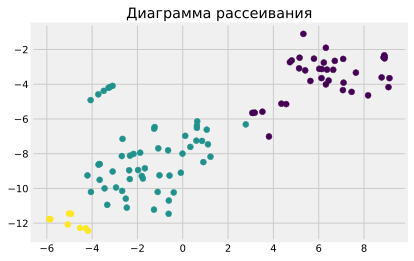

In [14]:

X_test_tsne = tsne.fit_transform(X_test_scaled)

plt.scatter(X_test_tsne[:, 0], X_test_tsne[:, 1],c=labels_test)

plt.title('Диаграмма рассеивания')

plt.show()

#### На новых данных распределение по порядковому номеру кластеров происходит случайным образом. Подскажите как можно задать точное отношение к 1,2,3 кластерам для новых данных?